# Bank Loan Approval Prediction Using Random Forest Classifier

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

### Dataset
- Features: Age, Income, LoanAmount, CreditScore
-  Target: Loan_Status (1 = Approved, 0 = Rejected)

In [21]:
# Dataset
data = {
    "Age": [25, 45, 39, 50, 23, 33, 41, 35, 52, 29, 47, 31, 60, 28, 42, 37, 46, 53, 34, 40],
    "Income": [30000, 80000, 60000, 90000, 25000, 40000, 70000, 50000, 100000, 35000,
               75000, 42000, 110000, 28000, 72000, 58000, 65000, 95000, 48000, 68000],
    "LoanAmount": [10000, 20000, 15000, 25000, 5000, 12000, 18000, 14000, 30000, 8000,
                   22000, 13000, 27000, 7000, 19000, 16000, 21000, 26000, 12500, 17500],
    "CreditScore": [650, 720, 690, 750, 630, 660, 710, 680, 780, 640,
                    730, 670, 800, 645, 705, 695, 725, 770, 660, 700],
    "Loan_Status": [1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
                    1, 0, 1, 0, 1, 1, 1, 1, 0, 1]
}

df = pd.DataFrame(data)
df.head()

,Age,Income,LoanAmount,CreditScore,Loan_Status
0,25,30000,10000,650,1
1,45,80000,20000,720,1
2,39,60000,15000,690,1
3,50,90000,25000,750,1
4,23,25000,5000,630,0


In [22]:
# Split the data
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
# Model fitting
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [24]:
# Test the model
y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=0.0)

print(f'Accuracy: {accuracy}')
print()
print(f'Confusion Matrix: \n{confusion}')
print()
print(f'Classification Report: \n {report}')

Accuracy: 0.8333333333333334

Confusion Matrix: 
[[1 0]
 [1 4]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.80      0.89         5

    accuracy                           0.83         6
   macro avg       0.75      0.90      0.78         6
weighted avg       0.92      0.83      0.85         6



In [25]:
# ROC-AUC Score
y_prob = rf.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 0.9


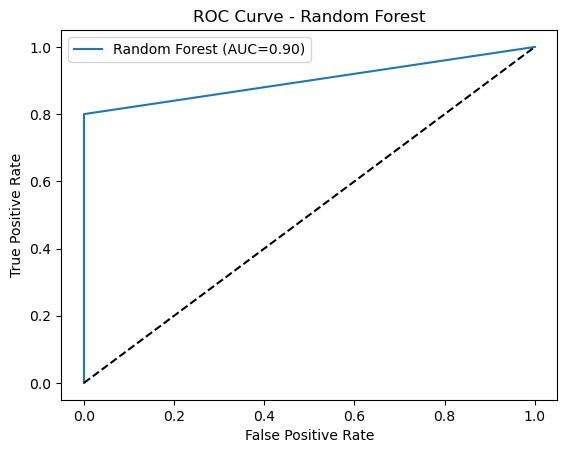

In [26]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"Random Forest (AUC={roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()